In [25]:
import pandas as pd
import os
%matplotlib inline

In [24]:
experiment_dir = "odsc_west_2018_20181028-182645/"
make_path = lambda x: os.path.join(experiment_dir,x)

In [26]:
lookback = pd.read_csv(make_path("lookback.csv"))

In [27]:
lookback

,average_delay,average_expected_number_obs,average_num_obs_difference,delay_intensity_s,delay_type,frequency_s,frequency_type,lookback_s,max_delay,max_num_obs_difference,rmse_delay,rmse_difference,rmse_no_delay,sensitive
0,10.008542,8.286,0.536,10,ExponentialDelayer,0.1,PoissonProcess,60,54.965550,4,1.878965,1.593672,0.285292,True
1,9.797829,14.618,0.556,10,ExponentialDelayer,0.1,PoissonProcess,120,57.378204,5,1.019092,0.722966,0.296127,True
2,9.544182,34.604,0.482,10,ExponentialDelayer,0.1,PoissonProcess,300,65.787566,5,0.401333,0.118499,0.282834,True
3,10.421445,64.798,0.570,10,ExponentialDelayer,0.1,PoissonProcess,600,65.979889,5,0.520510,0.230772,0.289738,True
4,9.700634,123.934,0.486,10,ExponentialDelayer,0.1,PoissonProcess,1200,68.364437,5,0.323600,0.032150,0.291450,True
5,9.797167,275.444,0.424,10,ExponentialDelayer,0.1,PoissonProcess,3000,58.124147,4,0.287527,0.000000,0.287527,True
6,9.640393,582.720,0.450,10,ExponentialDelayer,0.1,PoissonProcess,6000,59.218548,3,0.293745,0.000000,0.293745,True


Text(0.5, 0, 'Lookback (sec)')

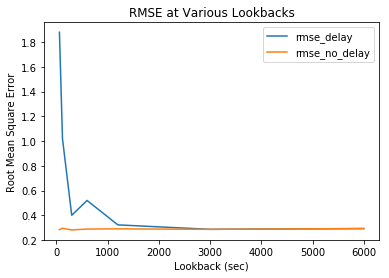

In [28]:
plt = lookback.plot(x = "lookback_s", title="RMSE at Various Lookbacks",y=["rmse_delay","rmse_no_delay"])
plt.set_ylabel("Root Mean Square Error")
plt.set_xlabel("Lookback (sec)")

In [29]:
sensitivities = pd.read_csv(make_path("sensitivities.csv"))

Text(0.5, 0, 'Model Sensitivity')

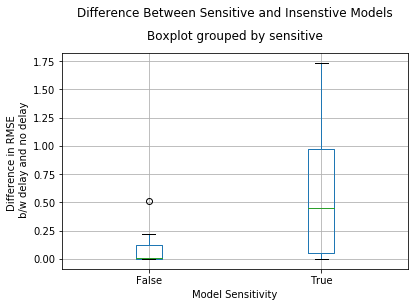

In [30]:
plt = sensitivities.boxplot(by = "sensitive", column = "rmse_difference")
plt.set_title("Difference Between Sensitive and Insenstive Models\n\n")
plt.set_ylabel("Difference in RMSE \n b/w delay and no delay")
plt.set_xlabel("Model Sensitivity")

In [31]:
delays = pd.read_csv(make_path("delay.csv"))

Text(0, 0.5, 'RMSE')

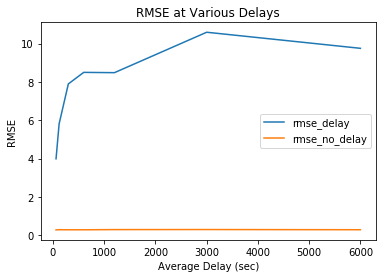

In [32]:
plt = delays.plot(x = "delay_intensity_s", y=["rmse_delay","rmse_no_delay"],title = "RMSE at Various Delays")
plt.set_xlabel(xlabel="Average Delay (sec)")
plt.set_ylabel(ylabel="RMSE")

In [33]:
frequencies = pd.read_csv(make_path("frequencies.csv"))

Text(0, 0.5, 'RMSE')

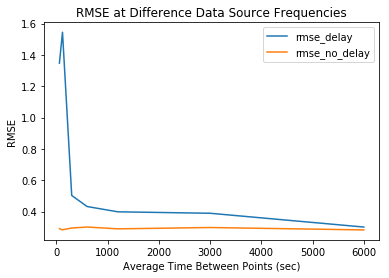

In [34]:
frequencies["periodicity"] = 1/frequencies["frequency_s"]
plt = frequencies.plot(x = "periodicity", y=['rmse_delay','rmse_no_delay'],title = "RMSE at Difference Data Source Frequencies")
plt.set_xlabel("Average Time Between Points (sec)")
plt.set_ylabel("RMSE")

## Interactions

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.ma as ma
def make_contour_plot(df):
    pivoted = df.pivot_table(index="average_expected_number_obs",
                             columns=["percent_points_missed"],
                             values="rmse_difference",
                             aggfunc='mean')
    X = pivoted.columns.values
    Y = pivoted.index.values
    Z = pivoted.values
    Zm = ma.masked_invalid(Z)
    x,y = np.meshgrid(X, Y)
    mesh = plt.contourf(x, y, Zm)
    mesh.ax.set_xlabel("Percent Points Droped (%)")
    mesh.ax.set_ylabel("Average Num Expected Points \nper Prediction")
    plt.colorbar(mesh)
    return mesh

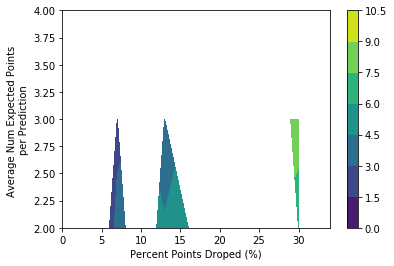

In [36]:
interactions = pd.read_csv(make_path("interaction.csv"))
interactions["average_expected_number_obs"] = np.round(interactions["average_expected_number_obs"])
interactions["percent_points_missed"] = np.round((interactions["average_num_obs_difference"] / interactions["average_expected_number_obs"]) * 100)
make_contour_plot(interactions[interactions["sensitive"] == True])

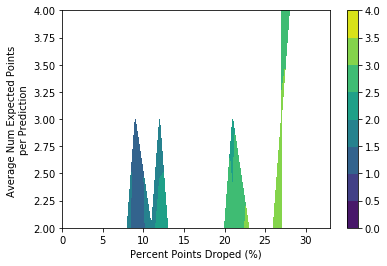

In [37]:
make_contour_plot(interactions[interactions["sensitive"] == False])

In [38]:
interaction_uniform = pd.read_csv(make_path("interaction_uniform.csv"))
make_contour_plot(interaction_uniform[interaction_uniform["sensitive"] == True])

KeyError: 'percent_points_missed'

In [ ]:
make_contour_plot(interaction_uniform[interaction_uniform["sensitive"] == False])